## 【1】复现内容：使用 sklearn 和 scipy 中聚类模块实现层次聚类的算法，根据聚类过程绘制树状图，或者热图，算法简报中说明使用了什么距离度量标准 
## 实验结果需要提供 JPG 或 PNG 格式的聚类效果树状图或其它能说明聚类效果的展示图片，但不限于 PDF，Jupyter，GIF，控制台截图，录屏等效果展示方式，文本聚类可以提交聚类前后的文本对比文档

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as hierarchy
from sklearn.cluster import AgglomerativeClustering
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster.hierarchy import dendrogram

#keep file in same directory

In [2]:
cd = pd.read_csv("data/crime_data.csv")

print(cd.describe())         #shows the summary.
cd.info()                    #Shows the information along with null values.

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
#now we have to standardize the data.

def std_fn(x):
    y=(x-x.min())/(x.std())
    return (y)

cd_std = std_fn(cd.iloc[ : , 1:])
cd_std.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,1.604405,1.509042,2.317136,1.487447
std,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000
25%,0.751921,0.767960,1.554430,0.830096
50%,1.480883,1.367929,2.348916,1.366589
75%,2.399260,2.447873,3.160673,2.015185
max,3.811265,3.503818,4.076060,4.131797


In [4]:
Z = hierarchy.linkage(cd_std, method ='complete',metric='euclidean')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [20.0, 20.0, 67.5, 67.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [113.75, 113.75, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [266.25, 266.25, 300.0, 300.0],
  [222.5, 222.5, 283.125, 283.125],
  [183.75, 183.75, 252.8125, 252.8125],
  [133.125, 133.125, 218.28125, 218.28125],
  [43.75, 43.75, 175.703125, 175.703125],
  [325.0, 325.0, 335.0, 335.0]

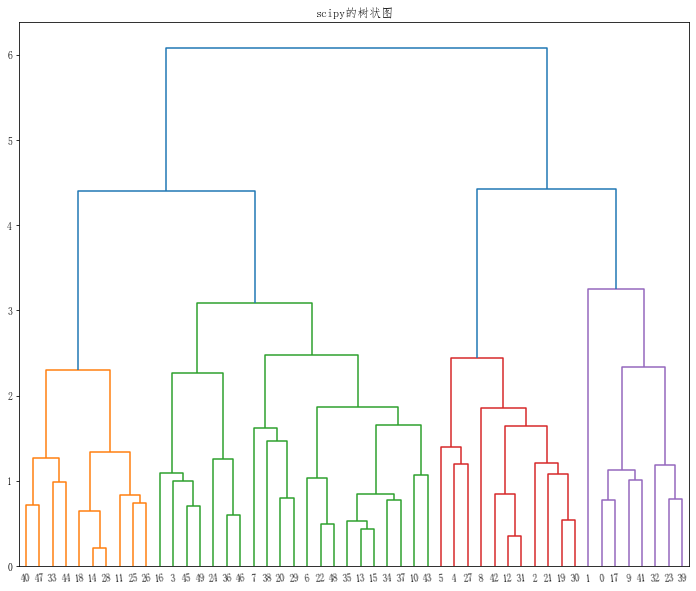

In [5]:
plt.figure(figsize=(12, 10))
plt.title('scipy的树状图')
hierarchy.dendrogram(Z,labels = cd_std.index,
                     leaf_rotation = 5,  
                     leaf_font_size = 10)

In [6]:
label = hierarchy.cut_tree(Z,height=3.5)
label = label.reshape(label.size,)


Text(0.5, 1.0, 'scipy的散点图')

<Figure size 864x720 with 0 Axes>

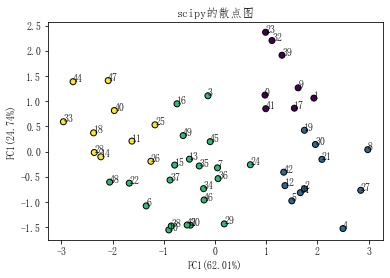

In [7]:
#根据两个最大的主成分进行绘图
from sklearn import decomposition as skldec #用于主成分分析降维的包
plt.figure(figsize=(12, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(cd_std)   #主城分析时每一行是一个输入数据
result = pca.transform(cd_std)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=label, edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[:,0].size):
    plt.text(result[i,0],result[i,1],cd_std.index[i])     #在每个点边上绘制数据名称
x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
plt.xlabel(x_label)    #绘制x轴标签
plt.ylabel(y_label)    #绘制y轴标签
plt.title('scipy的散点图')


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

<Figure size 864x720 with 0 Axes>

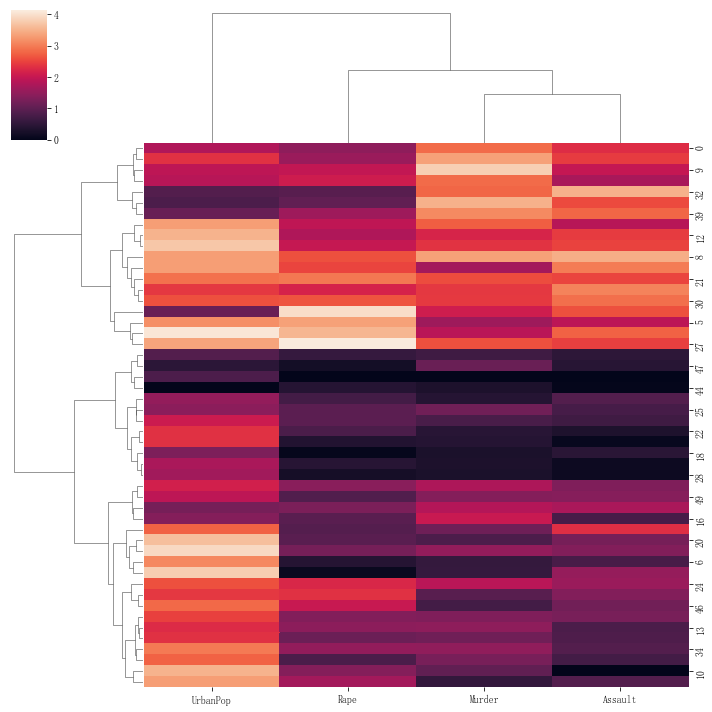

In [8]:
plt.figure(figsize=(12, 10))
sns.clustermap(cd_std,method ='ward',metric='euclidean')
plt.title

###  sklearn 中聚类模块

In [9]:
cd_comp = AgglomerativeClustering(n_clusters = 4 , linkage = "complete" ,affinity = "euclidean" ).fit(cd_std)
cd_comp.labels_

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [10]:
cd_cluster_column = pd.Series(cd_comp.labels_)
#now assign this matrix to to data set as a new column.
cd['grouping']=cd_cluster_column
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,grouping
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


Text(0.5, 1.0, 'sklearn的散点图')

<Figure size 864x720 with 0 Axes>

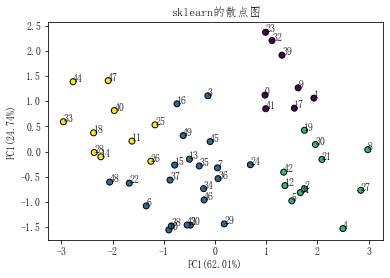

In [11]:
#根据两个最大的主成分进行绘图
plt.figure(figsize=(12, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(cd_std)   #主城分析时每一行是一个输入数据
result = pca.transform(cd_std)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=cd_comp.labels_, edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[:,0].size):
    plt.text(result[i,0],result[i,1],cd_std.index[i])     #在每个点边上绘制数据名称
x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
plt.xlabel(x_label)    #绘制x轴标签
plt.ylabel(y_label)    #绘制y轴标签
plt.title('sklearn的散点图')

### 对比上面scipy，差不多

In [12]:
def plot_dendrogram(model, **kwargs):
    # 创建链接矩阵，然后绘制树状图
    # 创建每个节点的样本计数
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # 叶子节点
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # 绘制相应的树状图
    dendrogram(linkage_matrix, **kwargs)

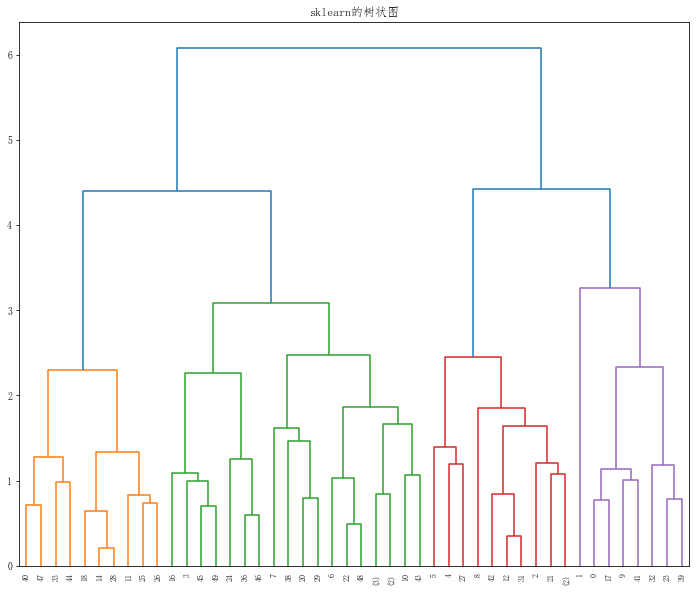

In [13]:
plt.figure(figsize=(12, 10))
model = AgglomerativeClustering(linkage='complete',distance_threshold=0, n_clusters=None)
model = model.fit(cd_std)
plt.title('sklearn的树状图')
# 绘制树状图的前三个级别
plot_dendrogram(model, truncate_mode='level', p=6)
plt.show()

### 对比上面scipy，差不多

## 结果放在一起

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [20.0, 20.0, 67.5, 67.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [113.75, 113.75, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [266.25, 266.25, 300.0, 300.0],
  [222.5, 222.5, 283.125, 283.125],
  [183.75, 183.75, 252.8125, 252.8125],
  [133.125, 133.125, 218.28125, 218.28125],
  [43.75, 43.75, 175.703125, 175.703125],
  [325.0, 325.0, 335.0, 335.0]

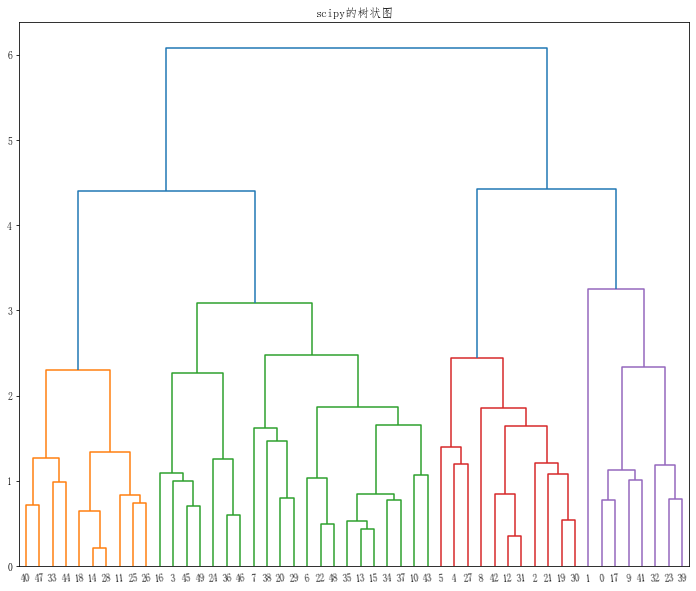

In [14]:
plt.figure(figsize=(12, 10))
plt.title('scipy的树状图')
hierarchy.dendrogram(Z,labels = cd_std.index,
                     leaf_rotation = 5,  
                     leaf_font_size = 10)

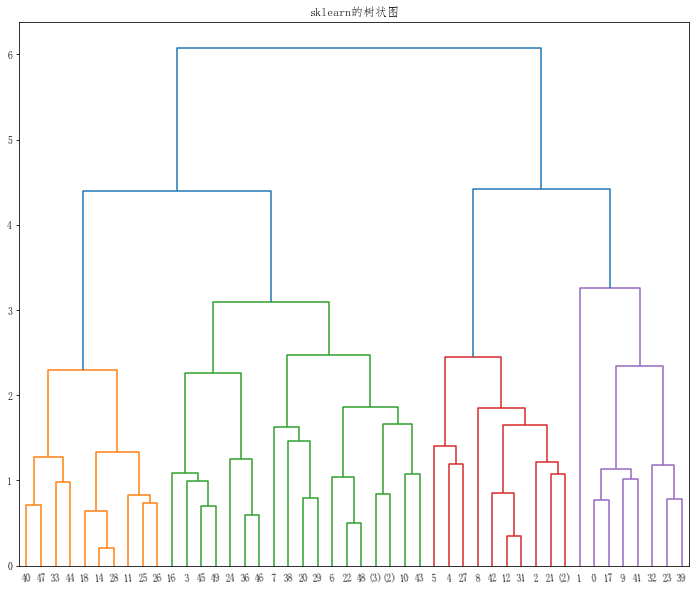

In [15]:
plt.figure(figsize=(12, 10))
model = AgglomerativeClustering(linkage='complete',distance_threshold=0, n_clusters=None)
model = model.fit(cd_std)
plt.title('sklearn的树状图')
# 绘制树状图的前三个级别
plot_dendrogram(model, truncate_mode='level',p=6,leaf_rotation = 5,  
                     leaf_font_size = 10)
plt.show()

Text(0.5, 1.0, 'scipy的散点图')

<Figure size 864x720 with 0 Axes>

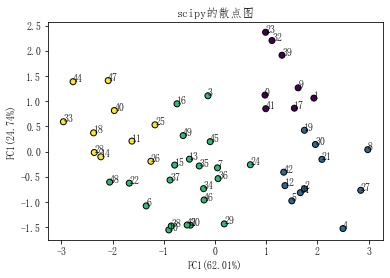

In [16]:
#根据两个最大的主成分进行绘图
from sklearn import decomposition as skldec #用于主成分分析降维的包
plt.figure(figsize=(12, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(cd_std)   #主城分析时每一行是一个输入数据
result = pca.transform(cd_std)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=label, edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[:,0].size):
    plt.text(result[i,0],result[i,1],cd_std.index[i])     #在每个点边上绘制数据名称
x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
plt.xlabel(x_label)    #绘制x轴标签
plt.ylabel(y_label)    #绘制y轴标签
plt.title('scipy的散点图')


Text(0.5, 1.0, 'sklearn的散点图')

<Figure size 864x720 with 0 Axes>

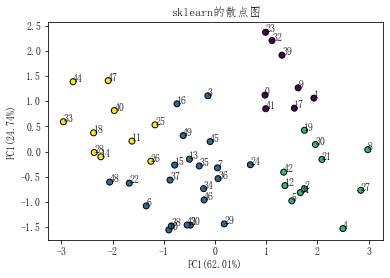

In [17]:
#根据两个最大的主成分进行绘图
plt.figure(figsize=(12, 10))
pca = skldec.PCA(n_components =2)    #选择方差95%的占比
pca.fit(cd_std)   #主城分析时每一行是一个输入数据
result = pca.transform(cd_std)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=cd_comp.labels_, edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[:,0].size):
    plt.text(result[i,0],result[i,1],cd_std.index[i])     #在每个点边上绘制数据名称
x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
plt.xlabel(x_label)    #绘制x轴标签
plt.ylabel(y_label)    #绘制y轴标签
plt.title('sklearn的散点图')

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

<Figure size 864x720 with 0 Axes>

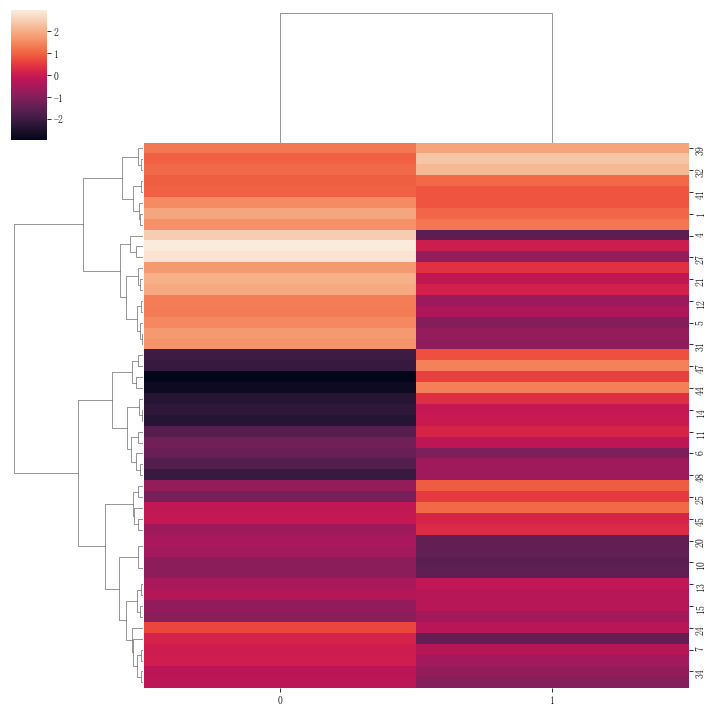

In [19]:
plt.figure(figsize=(12, 10))
sns.clustermap(result,method ='ward',metric='euclidean')
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

<Figure size 864x720 with 0 Axes>

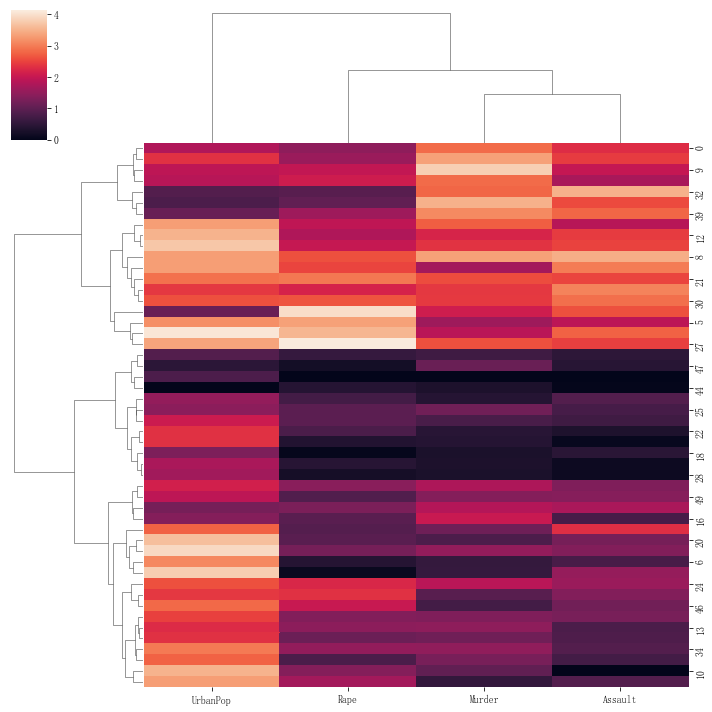

In [20]:
plt.figure(figsize=(12, 10))
sns.clustermap(cd_std,method ='ward',metric='euclidean')
plt.title